In [57]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt

Quicksort

In [58]:
def partition(A, p, r):
  x = A[r]
  i = p - 1
  for j in range(p, r):
    if A[j] <= x:
      i = i + 1
      A[i],  A[j] = A[j],  A[i]
  A[i + 1], A[r] = A[r], A[i + 1]
  return i + 1

def quicksort(A, p, r):
  if p < r:
    q = partition(A, p, r - 1)
    quicksort(A, p, q)
    quicksort(A, q + 1, r)

Arr_test = np.random.randint(1, 10, size = 10)
print(Arr_test)
Arr_test = np.insert(Arr_test, 0, 0)
quicksort(Arr_test, 1, Arr_test.shape[0])
Arr_test = np.delete(Arr_test, 0)

print(Arr_test)


[6 4 8 4 9 8 5 5 8 8]
[4 4 5 5 6 8 8 8 8 9]


Heapsort

In [59]:
def parent(i):
  return i // 2

def left(i):
  return 2 * i

def right(i):
  return (2 * i) + 1

def maxHeapify(A, i):
  l = left(i)
  r = right(i)
  
  if l <= A.shape[0] - 1 and A[l] > A[i]:
    largest = l
  else:
    largest = i
  
  if r <= A.shape[0] - 1 and A[r] > A[largest]:
    largest = r
  
  if largest != i:
    A[i], A[largest] = A[largest], A[i]
    maxHeapify(A, largest)

def build_maxHeap(A):
  A_heapSize = A.shape[0]
  for i in range(parent(A.shape[0]), -1, -1):
    maxHeapify(A, i)
  
def Heapsort(A):
  build_maxHeap(A)
  for i in range(A.shape[0] - 1, -1, -1):
    A[0], A[i] = A[i], A[0]
    build_maxHeap(A[:i])

Mergesort

In [60]:
def merge(A, p, q, r):
  n1 = q - p
  n2 = r - q
  L = np.zeros(n1 + 1)
  R = np.zeros(n2 + 1)
  for i in range(n1):
    L[i] = A[p + i]
  for j in range(n2):
    R[j] = A[q + j]
  L[n1] = np.inf
  R[n2] = np.inf
  i = 0
  j = 0
  for k in range(p, r):
    if L[i] <= R[j]:
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1

def mergeSort(A, p, r):
  if p + 1 < r:
    q = (p + r) // 2
    mergeSort(A, p, q)
    mergeSort(A, q, r)
    merge(A, p, q, r)
  
Arr_test = np.random.randint(1, 21, size = 10)
print(Arr_test)
mergeSort(Arr_test, 0, Arr_test.shape[0])
print(Arr_test)

[12  3 17  5  7 16 20 13  1 14]
[ 1  3  5  7 12 13 14 16 17 20]


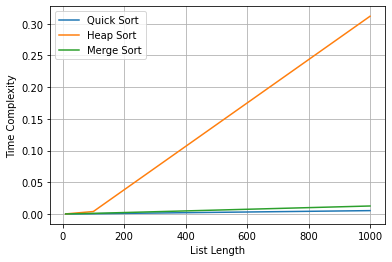

In [61]:
plt.xlabel('List Length')
plt.ylabel('Time Complexity')

times_quick = []
times_heap = []
times_merge = []
n = np.array([10, 100, 1000])

for i in n:
  a = np.random.randint(-500, 500, size = i)
  times_quick.append(timeit('quicksort(np.insert(a, 0, 0),  0,  a.shape[0])', number = 1, globals = globals()))
  times_heap.append(timeit('Heapsort(a)', number = 1, globals = globals()))
  times_merge.append(timeit('mergeSort(a,  0,  a.shape[0])', number = 1, globals = globals()))

plt.plot(n, times_quick, label = "Quick Sort")
plt.plot(n, times_heap, label = "Heap Sort")
plt.plot(n, times_merge, label = "Merge Sort")
plt.grid()
plt.legend()
plt.show()